一、Class Bass View
==================
這是 Django 將我們在 View 上常寫的功能全都包成 class，我們只要傳資料給 Class Bass View 即可做出我們想要的頁面

比方說，我們來改 index 這個 view

In [ ]:
# blog.views.py
def index(request):
    return render(request, 'blog/index.html')

# 改成
from django.views import generic

class IndexView(generic.TemplateView):
    template_name = 'blog/index.html'
    
# 修改 urls.py
path('', blog_views.IndexView.as_view(), name="index"), # 修改 index 這行


這兩種寫法都一樣，只不過變成另外一種寫法。但用 Class Bass View 寫有快速撰寫與擴增方便等等的優點，建議大家都可以試著用用看

如想傳 context 給 template render，只需要複寫 get_context_data 這個 function 即可

In [ ]:
# blog.views.py
class IndexView(generic.TemplateView):
    template_name = 'blog/index.html'

    # 想傳 contaxt 給 template
    def get_context_data(self, **kwargs):
        context = super().get_context_data(**kwargs)

        if self.request.user.is_authenticated():
            context['msg'] = "哈囉 %s" % self.request.user
        else:
            context['msg'] = "請先登入"
        return context

Class Bass View 還分有很多種，通常會依照頁面的性質做選擇，如我們的 IndexView 使用的 TemplateView 就是用來處理 template render 做出簡單無功能的頁面

https://docs.djangoproject.com/en/2.2/topics/class-based-views/

二、generic.View
=================
這是最底層最簡單的 Class Bass View 物件，用於處理簡單的 get post

比方說，修改 Login View

In [ ]:
# blog/views.py
def login(request):
    if request.POST:
        # 當使用者 POST 表單後運行這部分程式碼
        username = request.POST.get('username')
        password = request.POST.get('password')

        # 用 auth.authenticate 來找 db 內是否有這筆帳戶資料
        user = auth.authenticate(username=username, password=password)
        
        if user and user.is_active: # 判斷 user 是否存在，且沒有被凍結
            # 允許登入
            auth.login(request, user)
            return redirect(reverse_lazy('index')) # 進行導頁到 index
        else:     
            # 不允許登入
            context = {
                "msg": "登入失敗",
            }
            return render(request, 'blog/login.html', context)

    return render(request, 'blog/login.html')

# 改成
class LoginView(generic.View):

    # get function 裡面寫 get 時要處理的事
    def get(self, request, *args, **kwargs):
        return render(request, 'blog/login.html')

    # post function 裡面寫 post 時要處理的事
    def post(self, request, *args, **kwargs):
        # 當使用者 POST 表單後運行這部分程式碼
        username = request.POST.get('username')
        password = request.POST.get('password')

        # 用 auth.authenticate 來找 db 內是否有這筆帳戶資料
        user = auth.authenticate(username=username, password=password)
        
        if user and user.is_active: # 判斷 user 是否存在，且沒有被凍結
            # 允許登入
            auth.login(request, user)
            return redirect(reverse_lazy('index')) # 進行導頁到 index
        else:     
            # 不允許登入
            context = {
                "msg": "登入失敗",
            }
            return render(request, 'blog/login.html', context)
        
# urls.py
path('login/', blog_views.LoginView.as_view(), name="login"), # 修改這行

二、ListView、DetailView
============================
這是我們常用的兩種用來呈現頁面的 View
* ListView: 用來 render 出清單頁面，如 Article 清單頁
* DetailView: 用來 render 出內文頁面，如 Article 內文頁

通常會一起使用

https://docs.djangoproject.com/en/2.2/topics/class-based-views/generic-display/

In [ ]:
# blog/views.py
from blog.models import Article

class ArticleList(generic.ListView):
    template_name = 'blog/article-list.html' # 用來 render 的 template 
    context_object_name = 'articles' # 傳給 template 的 context 名稱

    def get_queryset(self): # 拿取一堆資料(list)
        return Article.objects.all()

class ArticleDetail(generic.DetailView):
    template_name = 'blog/article-detail.html' # 用來 render 的 template 
    context_object_name = 'article' # 傳給 template 的 context 名稱

    def get_object(self, queryset=None): # 依照傳入的資料，拿取單一一筆資料
        pk = self.kwargs.get("pk")
        return Article.objects.get(id=pk)

# urls.py
path('articles/', blog_views.ArticleList.as_view(), name="article-list"),
path('articles/<int:pk>/', blog_views.ArticleDetail.as_view(), name='article-detail'),

修改 Template
* nav_accounts.html

In [ ]:
<li class="nav-item">
    <a class="nav-link" href="{% url 'article-list' %}">文章清單</a>
</li>

新增
* blog/article-list.html
* blog/article-detail.html

In [ ]:
<!DOCTYPE html>

<html>
    <head>
        <title>Index</title>
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">
    </head>
    <body>
        {% include 'blog/nav_accounts.html' %}
        <div class="container">
            <h1>所有文章</h1>
            <p>{{ msg }}</p>
            <ul>
                {% for article in articles %}
                <li>
                    <a href="{% url 'article-detail' pk=article.id %}">{{ article.title }} by {{ article.author }}</a>
                </li>
                {% endfor %}
            </ul>
        </div>
    </body>
</html>

In [ ]:
<!DOCTYPE html>

<html>
    <head>
        <title>Index</title>
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">
    </head>
    <body>
        {% include 'blog/nav_accounts.html' %}
        <div class="container">
            <h1>{{ article.title}} by {{ article.author }}({{ article.createTime }})</h1>
            <p>{{ article.content }}</p>
            
        </div>
    </body>
</html>

完成後，我們就有 article list 頁與 article detail 頁了

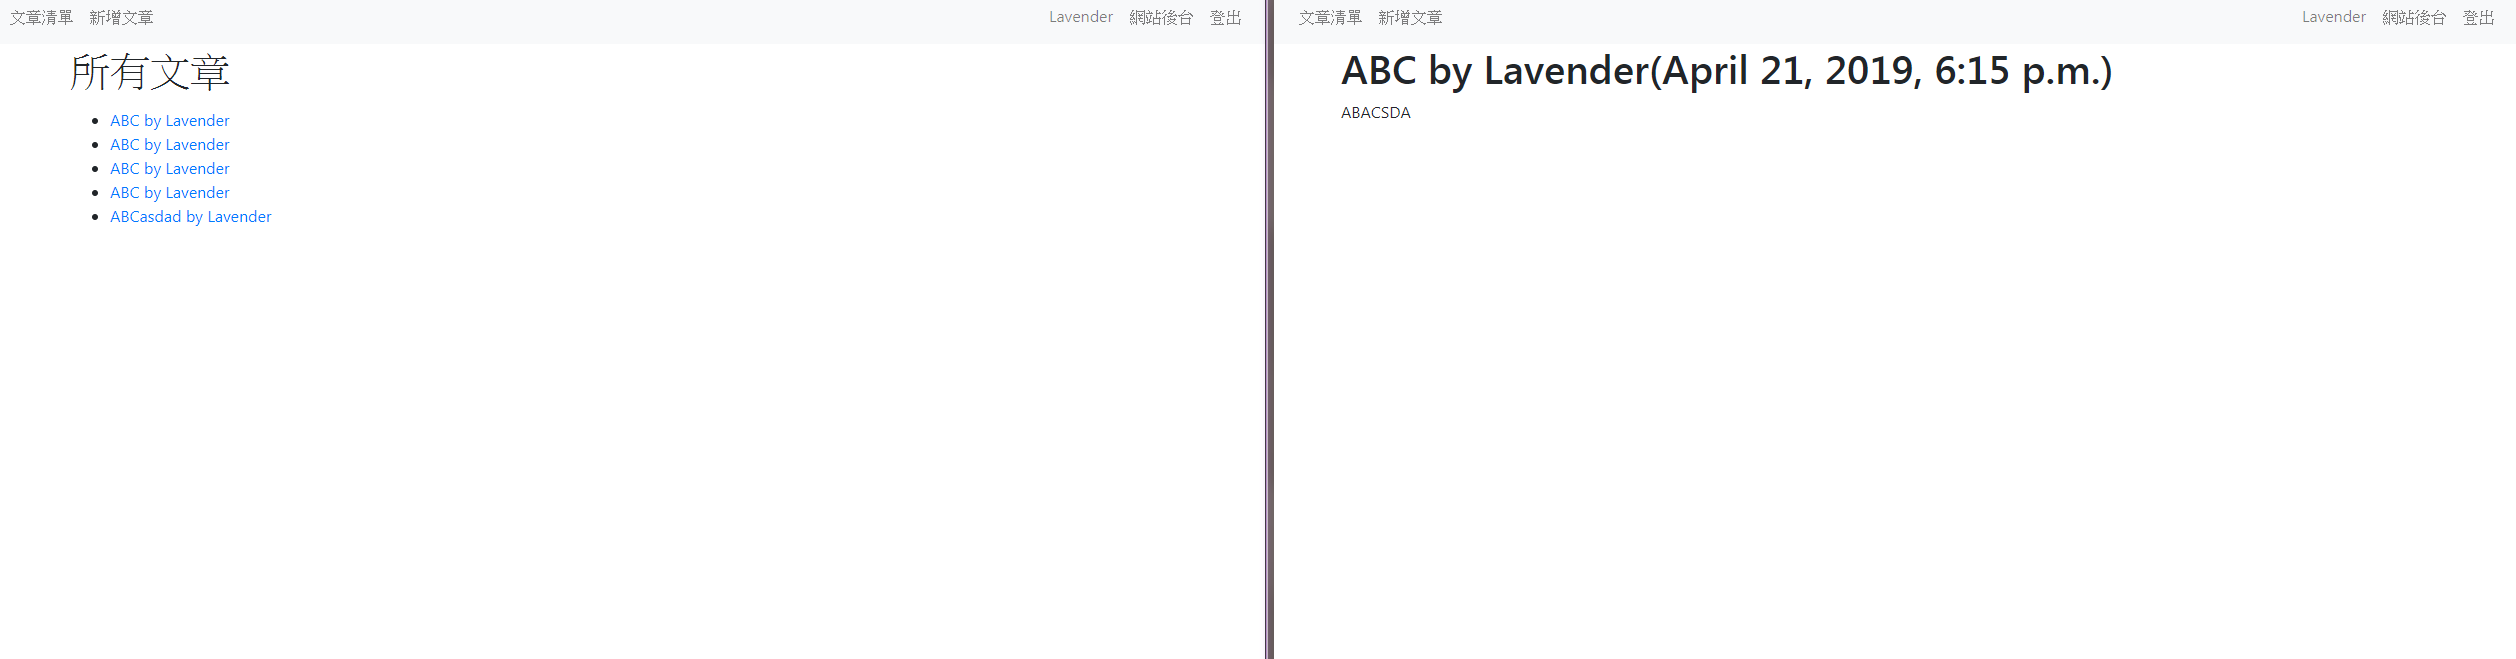

In [5]:
from IPython.display import Image
Image("images/P25.png")

而 list 最重要的還有分頁功能

In [ ]:
# blog/views.py
class ArticleList(generic.ListView):
    template_name = 'blog/article-list.html' # 用來 render 的 template 
    context_object_name = 'articles' # 傳給 template 的 context 名稱
    paginate_by = 3 # 每頁顯示幾個

    def get_queryset(self): # 拿取一堆資料(list)
        return Article.objects.all()

新增 template
* blog/pagination.html (我常用來做分頁的 html，使用 boostrap，也可以參考我的寫法自行設計，需要了解 paginator 機制)

In [ ]:
{% if is_paginated %}
<div class="col-sm-12" style="padding-left: 40%;">
    <ul class="pagination">
        {% if page_obj.has_previous %}
        <li class="page-item">
            <a class="page-link" href="?page={{ page_obj.previous_page_number }}" aria-label="Previous">
                <span aria-hidden="true">&laquo;</span>
            </a>
        </li>
        {% else %}
        <li class="page-item disabled">
            <a class="page-link" href="#" aria-label="Previous">
                <span aria-hidden="true">&laquo;</span>
            </a>
        </li>
        {% endif %}

        {% for i in paginator.page_range %}
            {% if page_obj.number == i %}
            <li class="page-item active" aria-current="page">
                <span class="page-link">
                    {{ i }}
                    <span class="sr-only">(current)</span>
                </span>
            </li>
            {% else %}
            <li class="page-item"><a class="page-link" href="?page={{ i }}">{{ i }}</a></li>
            {% endif %}
        {% endfor %}

        {% if page_obj.has_next %}
        <li class="page-item">
            <a class="page-link" href="?page={{ page_obj.next_page_number }}" aria-label="Next">
                <span aria-hidden="true">&raquo;</span>
            </a>
        </li>
        {% else %}
        <li class="page-item disabled">
            <a class="page-link" href="#" aria-label="Next">
                <span aria-hidden="true">&raquo;</span>
            </a>
        </li>
        {% endif %}
    </ul>
</div>
{% endif %}

修改 template
* article-list.html

In [ ]:
<!DOCTYPE html>

<html>
    <head>
        <title>Index</title>
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">
    </head>
    <body>
        {% include 'blog/nav_accounts.html' %}
        <div class="container">
            <h1>所有文章</h1>
            <p>{{ msg }}</p>
            <ul>
                {% for article in articles %}
                <li>
                    <a href="{% url 'article-detail' pk=article.id %}">{{ article.title }} by {{ article.author }}</a>
                </li>
                {% endfor %}
            </ul>
            {% include 'blog/pagination.html' %}
        </div>
    </body>
</html>

觀看結果

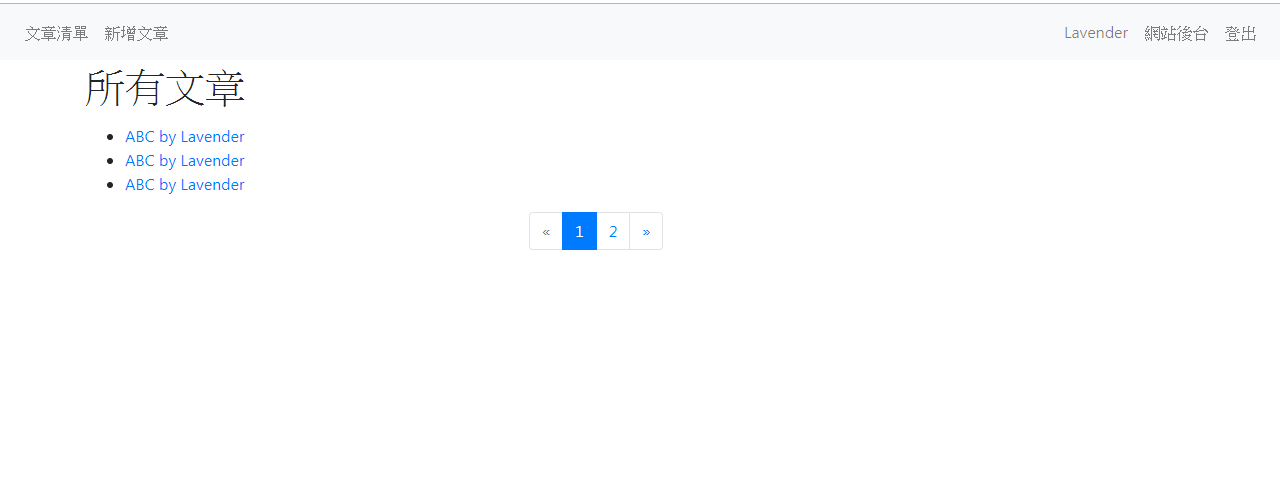

In [7]:
from IPython.display import Image
Image("images/P26.png")

三、FormView
=================
用於處理會提交表單的頁面(需要 django form)

比方說，更改新增文章頁

https://docs.djangoproject.com/en/2.2/topics/class-based-views/generic-editing/

In [ ]:
# blog.views.py
def createArticle(request):
    context = {}
    if request.POST:
        form = ArticleForm(request.POST)
        if form.is_valid():
            # 表單符合規則
            # 用 POST 的資料做成一個 article 物件(相當於 Article.objects.create)
            # commit=False 表示先別直接紀錄到 db，因為我們還要加其他資料
            article = form.save(commit=False) 
            article.author = request.user # 紀錄是誰 create 這個 article 的
            article.save() # 紀錄到 db 去

            context['msg'] = "成功新增一篇文章"
        else:
            # 表單不符合規則
            context['msg'] = "表單錯誤"
    else:
        form = ArticleForm()

    context['form'] = form
        
    return render(request, 'blog/article-add.html', context)

# 改成
class ArticleCreateView(generic.FormView):
    form_class =  ArticleForm
    template_name = 'blog/article-add.html'
    success_url = reverse_lazy('article-add') # redirect 到哪個 url

    def form_valid(self, form):
        # 表單符合規則
        # 用 POST 的資料做成一個 article 物件(相當於 Article.objects.create)
        # commit=False 表示先別直接紀錄到 db，因為我們還要加其他資料
        article = form.save(commit=False) 
        article.author = self.request.user # 紀錄是誰 create 這個 article 的
        article.save() # 紀錄到 db 去

        return super().form_valid(form)

    # 可不寫
    def form_invalid(self, form):
        # 表單不符合規則
        # do something
        return super().form_invalid(form)
    
# urls.py
path('articles/add/', blog_views.ArticleCreateView.as_view(), name="article-add"),


然後觀看結果

四、CreateView、UpdateView、DeleteView
=========================================
這三個 View 也都牽扯到 Django Form


https://docs.djangoproject.com/en/2.2/ref/class-based-views/generic-editing/
這三個 View 甚至可以不用做 Django Form，只需要給他參數即可(如上述文件)

但我推薦，還是自己做 Django Form，擴充性比較好。但我們還是可以用這些 View 做些方便的頁面

In [ ]:
# blog/views.py

# 這邊的 CreateView 寫法跟在第三節 FormView 的寫法完全相同
class ArticleCreateView(generic.CreateView):
    template_name = 'blog/article-add.html'
    success_url = reverse_lazy('article-add')
    form_class =  ArticleForm

    def form_valid(self, form):
        article = form.save(commit=False) 
        article.author = self.request.user 
        article.save()
        return super().form_valid(form)

    def form_invalid(self, form):
        return super().form_invalid(form)

class ArticleUpdateView(generic.UpdateView):
    model = Article # 想更新的 Model
    template_name = 'blog/article-update.html'
    form_class = ArticleForm  # 更新時使用的 Form

    def get_success_url(self):  # 更新完後，指定回傳的頁面
        # 我這邊指定回去 Detail 頁
        return reverse_lazy('article-detail', kwargs={'pk': self.object.id,})

class ArticleDeleteView(generic.DeleteView):
    model = Article # 想刪除的 Model
    success_url = reverse_lazy('article-list') # 刪除此 Article 後，指定回傳的頁面
    template_name = 'blog/article-delete.html'
    
# urls.py
path('articles/<int:pk>/update/', blog_views.ArticleUpdateView.as_view(), name='article-update'),
path('articles/<int:pk>/delete/', blog_views.ArticleDeleteView.as_view(), name='article-delete'),

修改 article-detail.html

In [ ]:
<!DOCTYPE html>

<html>
    <head>
        <title>Index</title>
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">
    </head>
    <body>
        {% include 'blog/nav_accounts.html' %}
        <div class="container">
            <h1>{{ article.title}} by {{ article.author }}({{ article.createTime }})</h1>
            <p>{{ article.content }}</p>

            {% if request.user.is_authenticated and request.user ==  article.author %}
                <a class="btn btn-primary" href="{% url 'article-update' pk=article.id %}">編輯</a>
                <a class="btn btn-danger" href="{% url 'article-delete' pk=article.id %}">刪除</a>
            {% endif %}
        </div>
    </body>
</html>

新增 article-update.html article-delete.html

In [ ]:
<!DOCTYPE html>

{% load bootstrap4 %}

<html>
    <head>
        <title>Index</title>
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">
    </head>
    <body>
        {% include 'blog/nav_accounts.html' %}
        <div class="container">
            <h1>更新文章</h1>
            <p>{{ msg }}</p>
            <form method="POST" action=".">
                {% csrf_token %}
                {% bootstrap_form form %}
                <input class="btn btn-primary" type="submit">
                <input class="btn btn-danger" type="button" onclick='javascript:history.back(-1);' value='返回'>
            </form>
        </div>
    </body>
</html>

In [ ]:
<!DOCTYPE html>

{% load bootstrap4 %}

<html>
    <head>
        <title>Index</title>
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">
    </head>
    <body>
        {% include 'blog/nav_accounts.html' %}
        <div class="container">
            <h1>刪除文章</h1>
            <p>是否要刪除此文章?</p>
            <form method="POST" action=".">
                {% csrf_token %}
                {% bootstrap_form form %}
                <input class="btn btn-primary" type="submit">
                <input class="btn btn-danger" type="button" onclick='javascript:history.back(-1);' value='返回'>
            </form>
        </div>
    </body>
</html>

Runserver 試試更新文章與刪除文章是否可以